In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ntwk import gsoftmax, SoftmaxNtwk
from disp import set_plot

In [2]:
N = 1000
R = 4

J = np.nan*np.zeros((R, R, N, N))

for r_to in range(R):
    for r_from in range(R):
        J[r_to, r_from, :, :] = np.random.randn(N, N)*np.sqrt(R/N)

In [3]:
ntwk = SoftmaxNtwk(J)

In [4]:
x_0 = np.random.randn(N, R)

t, xs, ys = ntwk.run(g=np.inf, t_max=200, x_0=x_0)

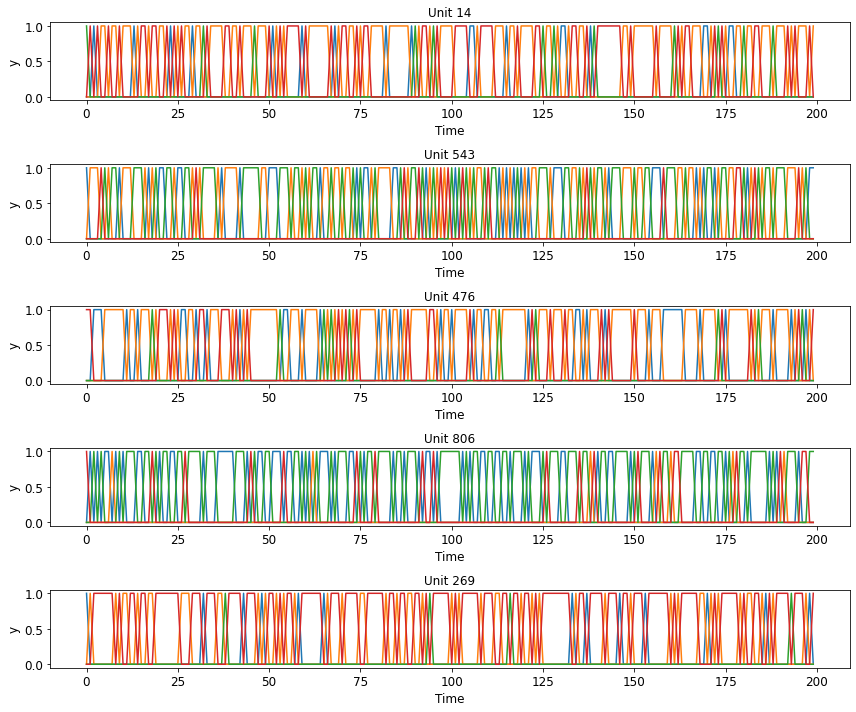

In [5]:
fig, axs = plt.subplots(5, 1, figsize=(12, 10), tight_layout=True)
iunits = np.random.permutation(N)[:5]
for iunit, ax in zip(iunits, axs):
    ax.plot(t, ys[:, iunit, :])
    set_plot(ax, x_label='Time', y_label='y', title=f'Unit {iunit}', font_size=12)

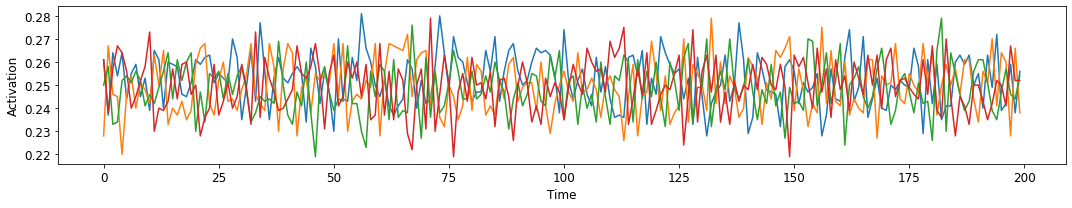

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3), tight_layout=True)
ax.plot(t, ys.mean(axis=1))
set_plot(ax, x_label='Time', y_label='Activation', font_size=12)

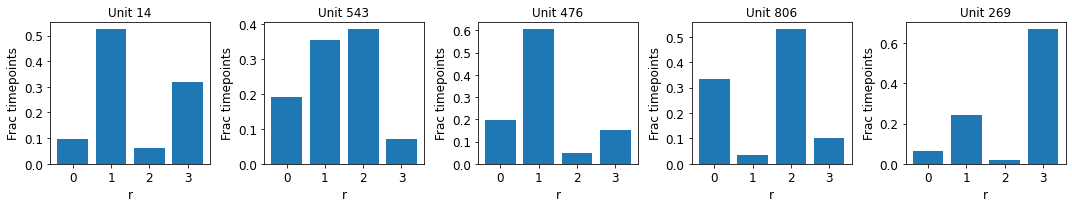

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3), tight_layout=True)
for iunit, ax in zip(iunits, axs):
    ax.bar(np.arange(R), ys[:, iunit, :].mean(axis=0))
    set_plot(ax, x_label='r', y_label='Frac timepoints', title=f'Unit {iunit}', font_size=12)